In [1]:
# importing the necessary libraries for the analysis and visualization
# Load EDA Pkgs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# This is for sentiment analysis
from textblob import TextBlob

In [3]:
# Load Dataset
dataset = pd.read_csv("drugsComTrain_raw.tsv",sep='\t')

### Doing some basic exploration and statistical summary


In [4]:
# Checking the first five rows
dataset.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
# To check Columns
dataset.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [6]:
# To check the Missing Values
dataset.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

### Note
+ There are 899 missing values are in the condition column which means most people don't know their condition by name or they are keeping it private

### ANALYSIS QUESTION AND ANSWERS

+ 1.How many drugs do we have?

In [7]:
len(dataset['drugName'].unique().tolist())

3436

+ 2. What is the most popular drug?


In [8]:
# Top 20  Most Popular drugs
dataset['drugName'].value_counts().nlargest(20)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Citalopram                             995
Medroxyprogesterone                    995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Name: drugName, dtype: int64

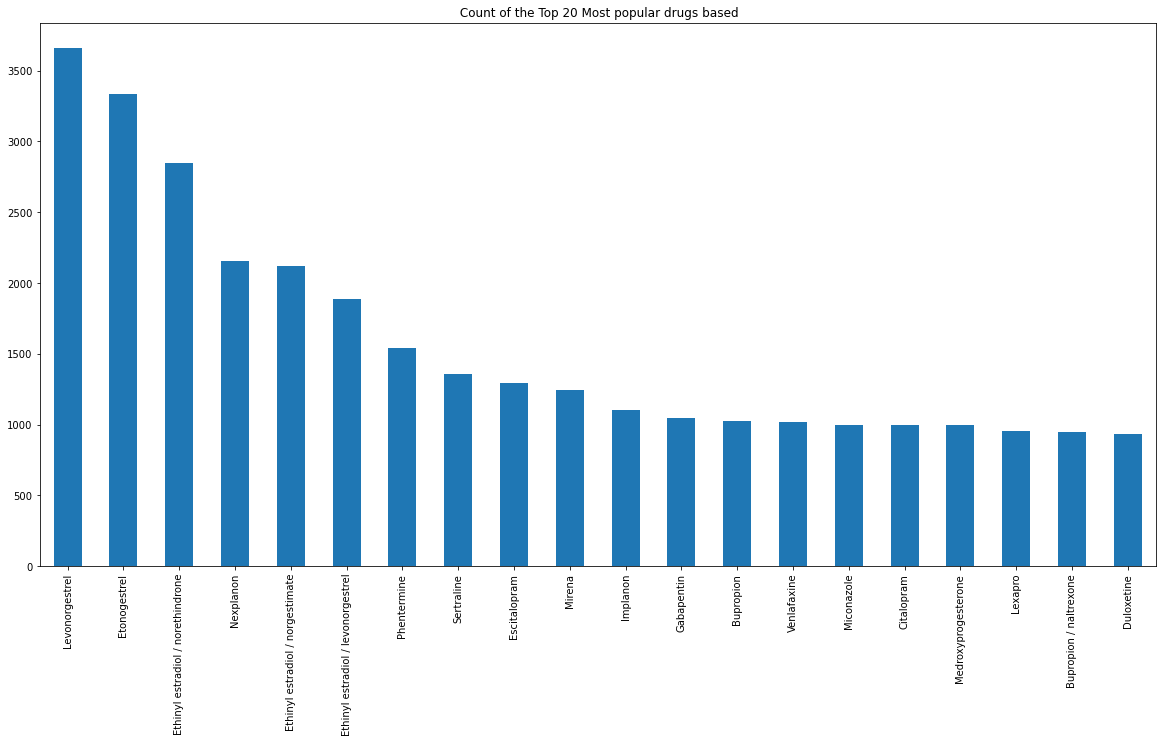

In [9]:
# plot of the top 20 Drugs most popular drug
plt.figure(figsize=(20,10))
dataset['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title(" Count of the Top 20 Most popular drugs based")
plt.show()

Most of the commonest drugs are hormonal drugs

In [10]:
# The 20 Least most popular drug
dataset['drugName'].value_counts().nsmallest(20)

Advate                        1
All Day Allergy               1
Prolastin-C                   1
Blistex                       1
Rifadin                       1
Glecaprevir / pibrentasvir    1
Zejula                        1
Levodopa                      1
Neo-Poly-Dex                  1
Norpace                       1
Magaldrate / simethicone      1
MG217 Medicated Tar           1
Ery Pads                      1
Brinzolamide                  1
Lillow                        1
Glumetza                      1
Mekinist                      1
Diazoxide                     1
Hepatitis b adult vaccine     1
Gynazole-1                    1
Name: drugName, dtype: int64

<AxesSubplot:>

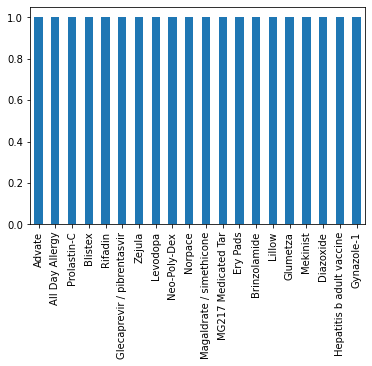

In [11]:
# Plot of the 20 Least most popular drug
dataset['drugName'].value_counts().nsmallest(20).plot(kind='bar')


###  What are the groups/classification of drugs used?
+ so the suffix or endings of the drugs are gotten

In [12]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [13]:
#function to classify the drugs based on their suffix
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return drug_suffix[i]

In [14]:
classify_drug('valsartan')


'arb blocker'

In [15]:
#applying the above function to create a new column
dataset['drug_classes'] = dataset['drugName'].apply(classify_drug)


In [16]:
dataset[['drugName','drug_classes']]


,drugName,drug_classes
0,Valsartan,arb blocker
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None
...,...,...
161292,Campral,None
161293,Metoclopramide,oral hypoglycemics
161294,Orencia,None
161295,Thyroid desiccated,None


In [18]:
# How many Groups of Drugs By Class
len(dataset['drug_classes'].unique().tolist())

23

In [19]:
# Which of class of drug  is the most commonest
dataset['drug_classes'].value_counts()

antifungal (except metronidazole)    4201
opiod analgesics                     3945
oral hypoglycemics                   3555
antibiotic                           3401
anti-anxiety                         2645
h2 blockers (anti-ulcers)            1228
beta blockers                         966
corticosteroid (prednisone)           886
antipyschotics (phenothiazine)        664
arb blocker                           560
ace inhibitor                         432
calcium channel blocker               233
alpha blocker                         153
anesthetic                            129
antibiotic(penicillins)               119
thrombolytics                         116
beta blocker                           97
neuromuscular blocking agents          45
antibiotic (cephalosporins)            29
pituitary hormone                      28
barbiturate                            19
anticoagulants                          9
Name: drug_classes, dtype: int64

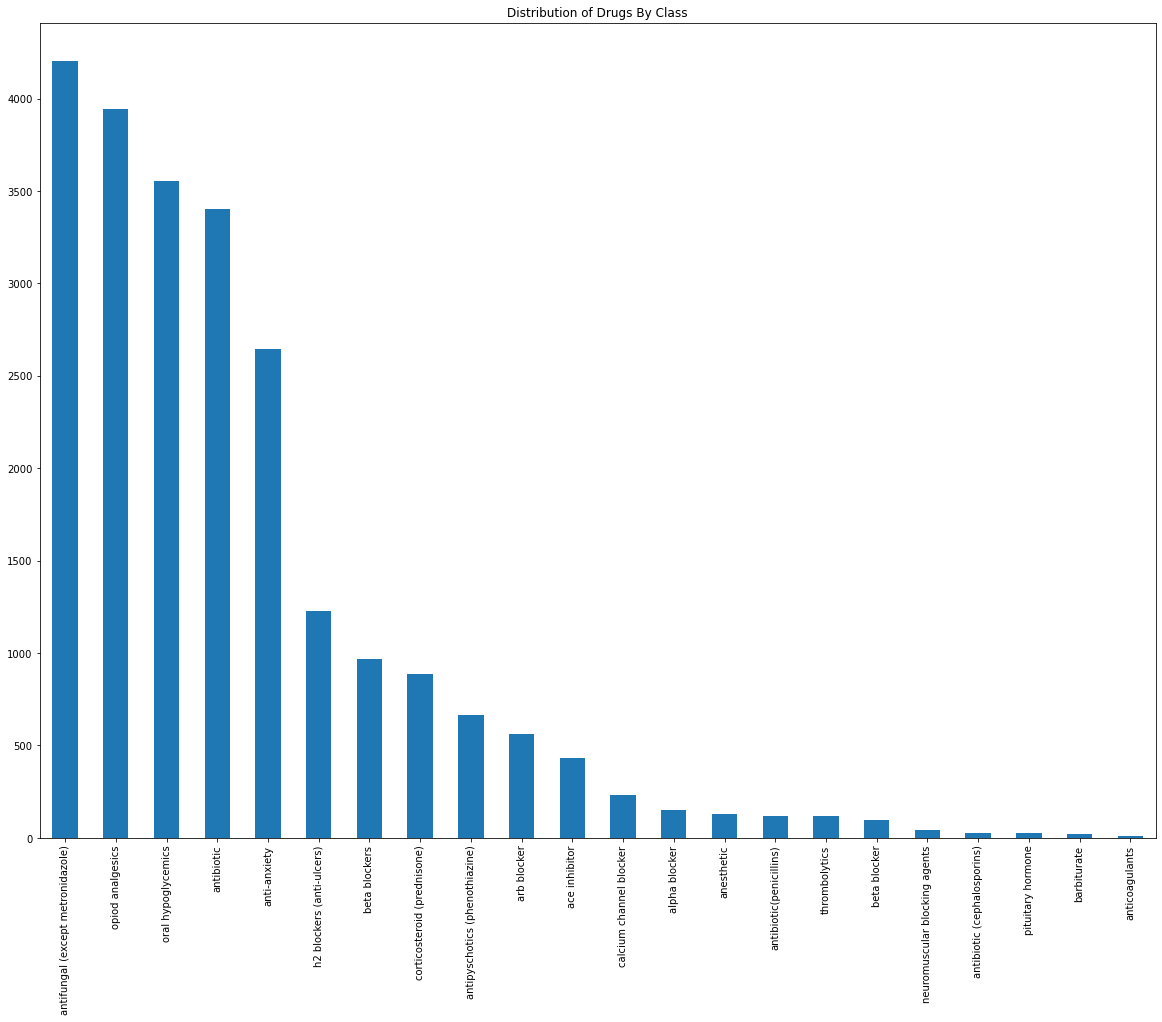

In [20]:
# plot of the classes of drug  is the  commonest
plt.figure(figsize=(20,15))
dataset['drug_classes'].value_counts().plot(kind='bar')
plt.title("Distribution of Drugs By Class")
plt.show()


### The most commonest class/group of drugs used is
+ Antifungal
+ Opiod Analgesics(Pain Killers)
+ Oral Hypoglycemics (DM)
+ Antibiotic

In [21]:
# Distribution of Drugs Per Drug Group based on size
drug_groups = dataset.groupby('drug_classes').size()
drug_groups

drug_classes
ace inhibitor                         432
alpha blocker                         153
anesthetic                            129
anti-anxiety                         2645
antibiotic                           3401
antibiotic (cephalosporins)            29
antibiotic(penicillins)               119
anticoagulants                          9
antifungal (except metronidazole)    4201
antipyschotics (phenothiazine)        664
arb blocker                           560
barbiturate                            19
beta blocker                           97
beta blockers                         966
calcium channel blocker               233
corticosteroid (prednisone)           886
h2 blockers (anti-ulcers)            1228
neuromuscular blocking agents          45
opiod analgesics                     3945
oral hypoglycemics                   3555
pituitary hormone                      28
thrombolytics                         116
dtype: int64

In [22]:
# Convert to  the group and classification into dataframe
drug_groups_df = pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})
drug_groups_df

,drug_class,counts
0,ace inhibitor,432
1,alpha blocker,153
2,anesthetic,129
3,anti-anxiety,2645
4,antibiotic,3401
5,antibiotic (cephalosporins),29
6,antibiotic(penicillins),119
7,anticoagulants,9
8,antifungal (except metronidazole),4201
9,antipyschotics (phenothiazine),664


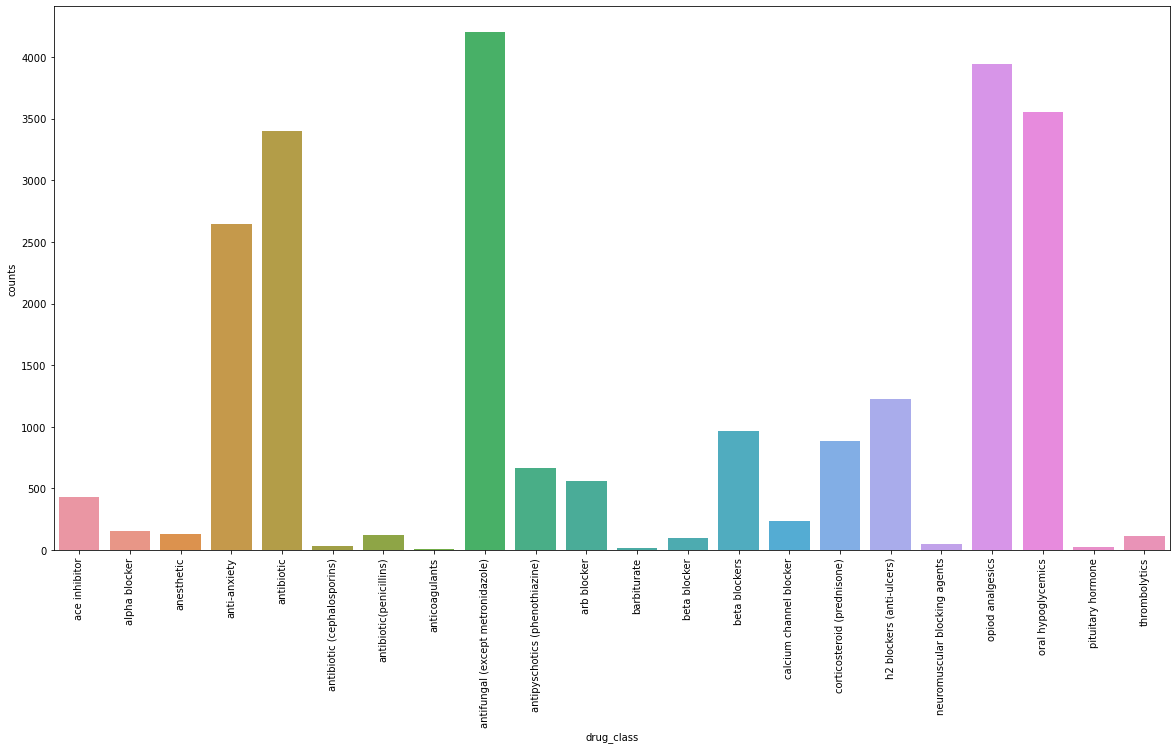

In [26]:
# Seaborn Plot
plt.figure(figsize=(20,10))

g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
g.set_xticklabels(drug_groups_df['drug_class'].values,rotation=90)
plt.show()


### Question on Conditions
+ How many conditions are there?
+ Which conditions are the most common?
+ Distribution of conditions and rating

In [27]:
# Number of Conditions
len(dataset['condition'].unique())

885

In [28]:
#### Most commonest Conditions
dataset['condition'].value_counts().nlargest(20)

Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Anxiety and Stress            1663
Name: condition, dtype: int64

<AxesSubplot:>

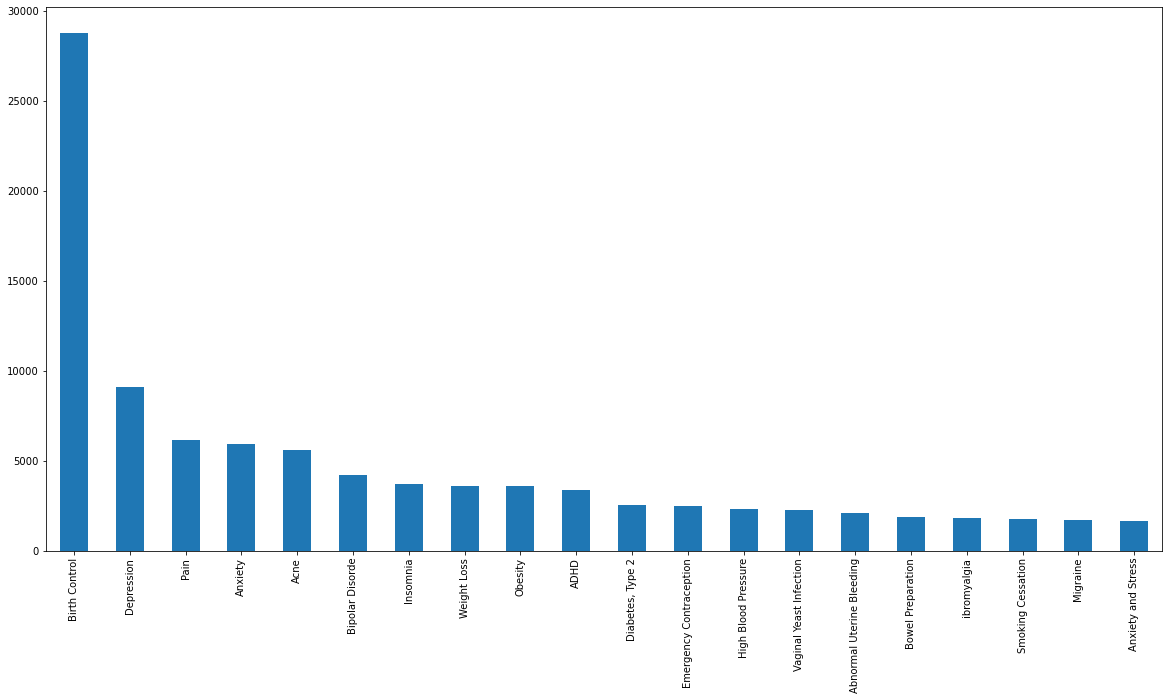

In [29]:
#### Most commonest Conditions
dataset['condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))

Note
The  commonest condition is Birth Control,followed by Depression and Pain and Anxiety
Makes sense as compared to the drug distribution

<AxesSubplot:>

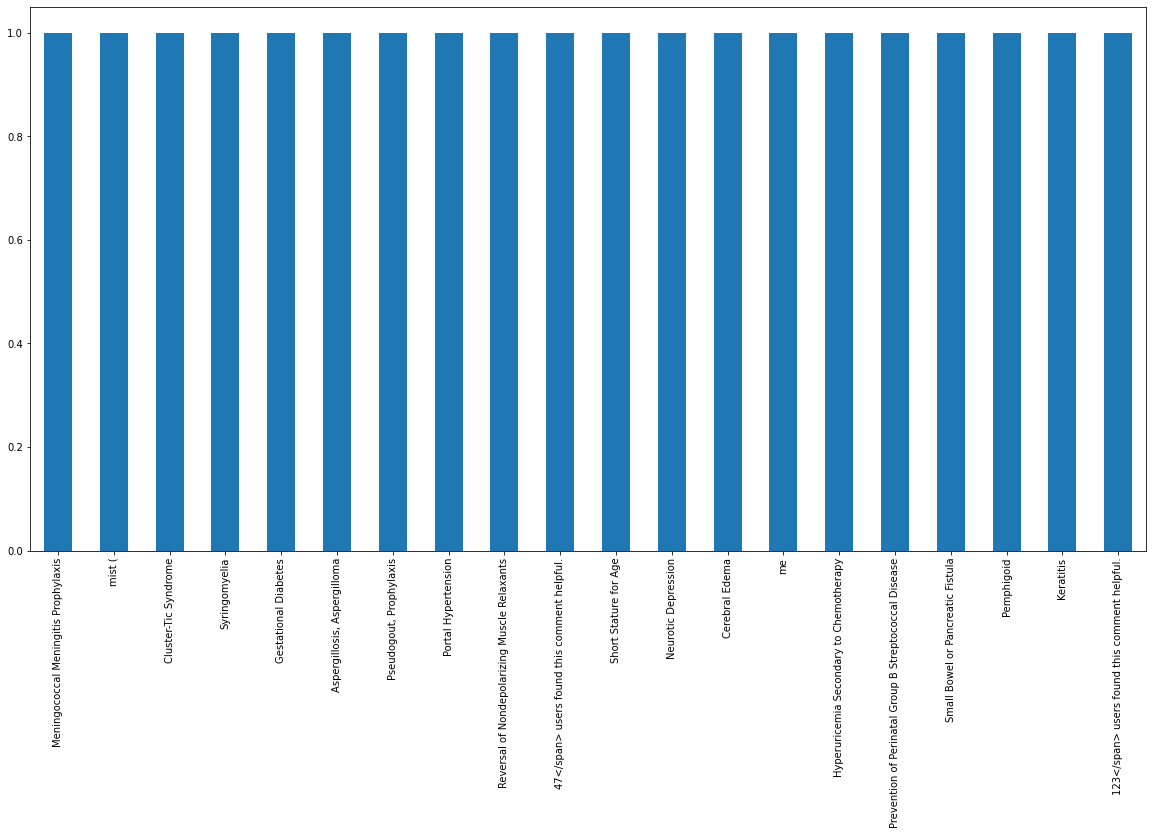

In [26]:
#### Least commonest Conditions
dataset['condition'].value_counts().nsmallest(20).plot(kind='bar',figsize=(20,10))

In [27]:
# How many Drugs per condition (Top 20)
dataset.groupby('condition')['drugName'].nunique().nlargest(20)

condition
Not Listed / Othe                             214
Pain                                          200
Birth Control                                 172
High Blood Pressure                           140
Acne                                          117
Depression                                    105
Rheumatoid Arthritis                           98
Diabetes, Type 2                               89
Allergic Rhinitis                              88
Bipolar Disorde                                80
Osteoarthritis                                 80
Anxiety                                        78
Insomnia                                       78
Abnormal Uterine Bleeding                      74
Migraine                                       59
Psoriasis                                      58
3</span> users found this comment helpful.     57
Endometriosis                                  57
ADHD                                           55
Asthma, Maintenance                     

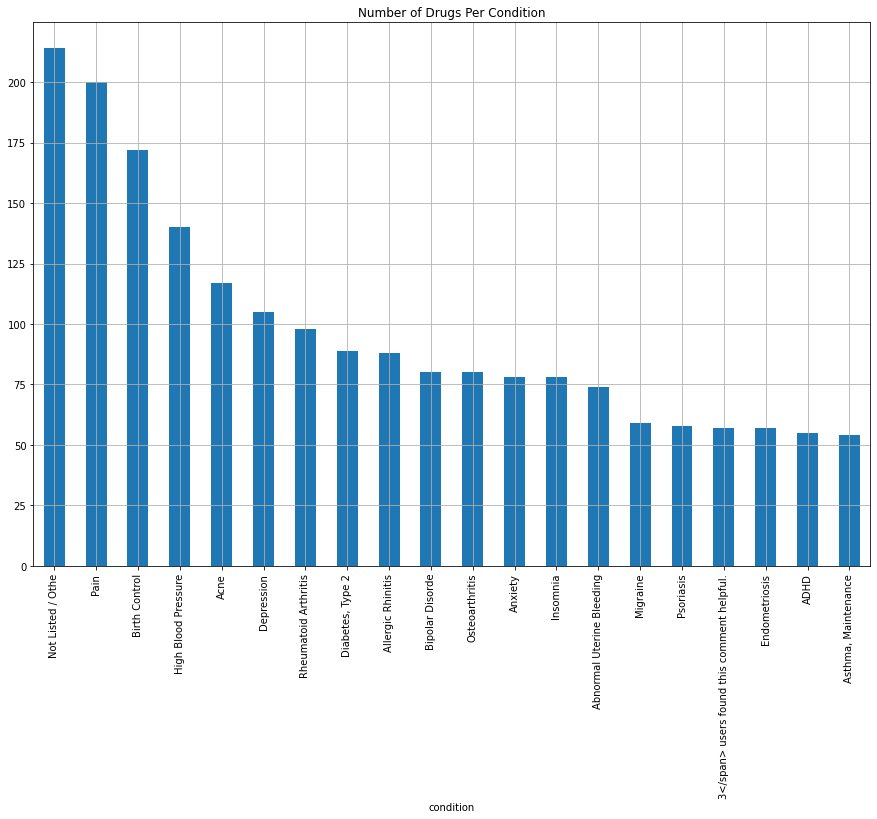

In [28]:
# How many Drugs per condition (Top 20)
plt.figure(figsize=(15,10))
dataset.groupby('condition')['drugName'].nunique().nlargest(20).plot(kind='bar')
plt.title("Number of Drugs Per Condition")
plt.grid()
plt.show()

Pain,Birth Control and HBP have the highest number of different/unique drugs for their condition

#### Questions on Rating
+ Distribution of rating
+ Average Rating Per Count

In [29]:
# Distrubtion of Rating By Size
dataset.groupby('rating').size()


rating
1.0     21619
2.0      6931
3.0      6513
4.0      5012
5.0      8013
6.0      6343
7.0      9456
8.0     18890
9.0     27531
10.0    50989
dtype: int64

<AxesSubplot:xlabel='rating'>

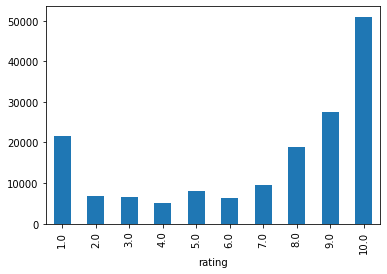

In [30]:
# Distrubtion of Rating By Size
dataset.groupby('rating').size().plot(kind='bar')


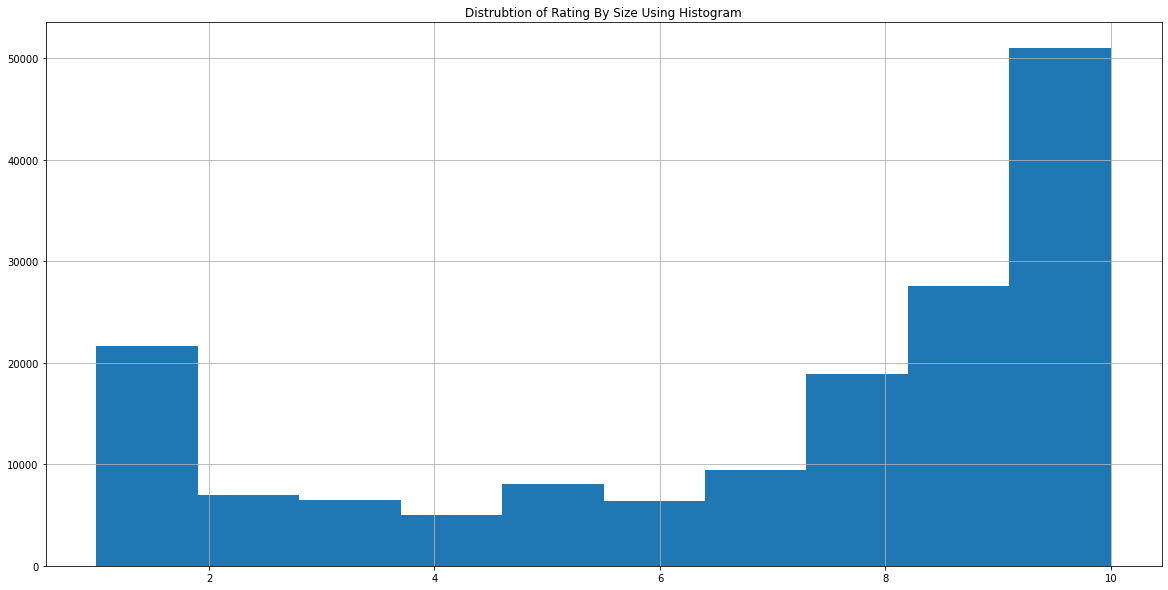

In [31]:
# # Distrubtion of Rating By Size Using Histogram
plt.figure(figsize=(20,10))
dataset['rating'].hist()
plt.title("Distrubtion of Rating By Size Using Histogram")
plt.show()

Most people rated at the extremes

In [32]:
# Average Rating of Drugs
avg_rating = (dataset['rating'].groupby(dataset['drugName']).mean())

In [33]:
avg_rating


drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.211538
Abacavir / lamivudine / zidovudine       9.000000
Abatacept                                7.157895
                                          ...    
Zyvox                                    9.000000
ZzzQuil                                  2.500000
depo-subQ provera 104                    1.000000
ella                                     6.980392
femhrt                                   4.000000
Name: rating, Length: 3436, dtype: float64

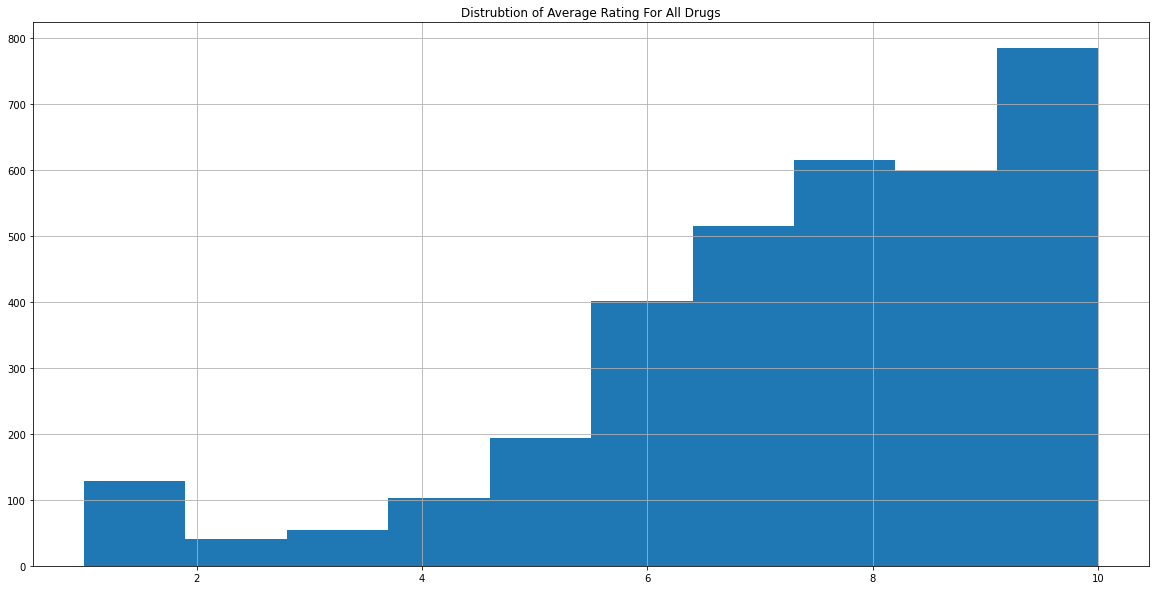

In [34]:
# Average Rating For All Drugs
plt.figure(figsize=(20,10))
avg_rating.hist()
plt.title("Distrubtion of Average Rating For All Drugs")
plt.show()

In [35]:
# Average Rating of Drugs By Class
avg_rating_per_drug_class = (dataset['rating'].groupby(dataset['drug_classes']).mean())

In [36]:
# Which Group of Drugs have the higest mean/average rating
avg_rating_per_drug_class.nlargest(20)

drug_classes
anticoagulants                    9.222222
barbiturate                       8.894737
neuromuscular blocking agents     8.622222
anti-anxiety                      8.543667
pituitary hormone                 8.500000
beta blockers                     7.681159
corticosteroid (prednisone)       7.477427
opiod analgesics                  7.446388
h2 blockers (anti-ulcers)         7.280945
oral hypoglycemics                7.268917
antipyschotics (phenothiazine)    7.146084
thrombolytics                     7.103448
antibiotic(penicillins)           7.033613
alpha blocker                     6.954248
beta blocker                      6.587629
antibiotic                        6.500735
arb blocker                       6.464286
antibiotic (cephalosporins)       6.344828
anesthetic                        5.937984
ace inhibitor                     5.759259
Name: rating, dtype: float64

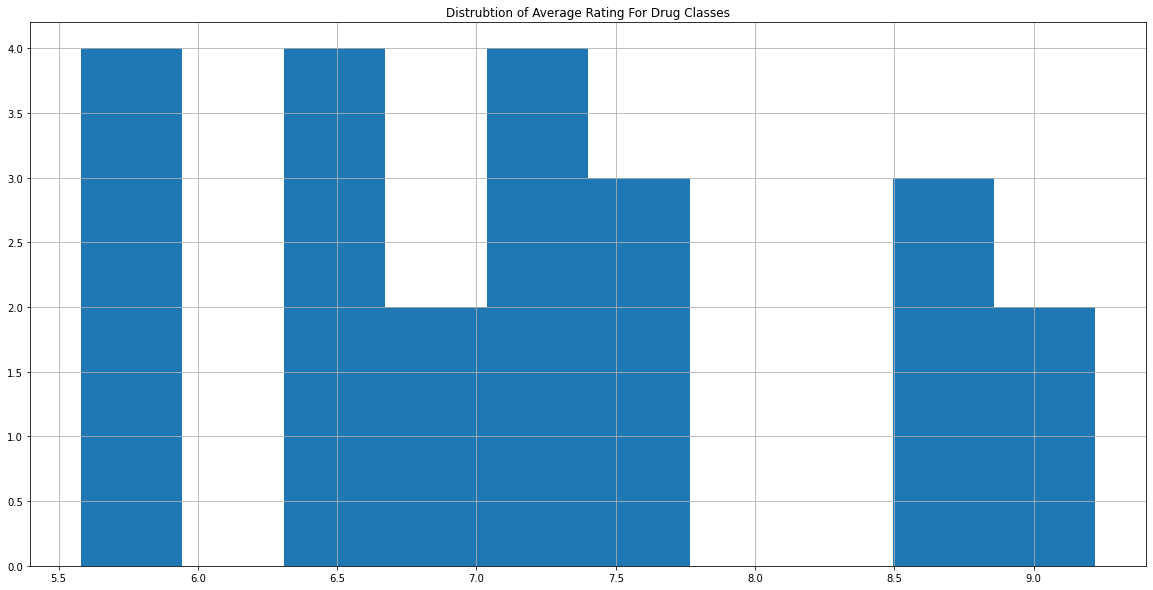

In [37]:
# Average Rating For All Drugs
plt.figure(figsize=(20,10))
avg_rating_per_drug_class.hist()
plt.title("Distrubtion of Average Rating For Drug Classes")
plt.show()

In [38]:
# Which Group of Drugs have the higest mean/average rating
avg_rating_per_drug_class.nlargest(20)

drug_classes
anticoagulants                    9.222222
barbiturate                       8.894737
neuromuscular blocking agents     8.622222
anti-anxiety                      8.543667
pituitary hormone                 8.500000
beta blockers                     7.681159
corticosteroid (prednisone)       7.477427
opiod analgesics                  7.446388
h2 blockers (anti-ulcers)         7.280945
oral hypoglycemics                7.268917
antipyschotics (phenothiazine)    7.146084
thrombolytics                     7.103448
antibiotic(penicillins)           7.033613
alpha blocker                     6.954248
beta blocker                      6.587629
antibiotic                        6.500735
arb blocker                       6.464286
antibiotic (cephalosporins)       6.344828
anesthetic                        5.937984
ace inhibitor                     5.759259
Name: rating, dtype: float64

In [39]:
# Which Drugs have the higest mean/average rating
avg_rating.nlargest(20)

drugName
A + D Cracked Skin Relief                              10.0
A / B Otic                                             10.0
Absorbine Jr.                                          10.0
Accolate                                               10.0
Acetaminophen / caffeine / magnesium salicylate        10.0
Acetaminophen / dextromethorphan / doxylamine          10.0
Acetaminophen / phenylephrine                          10.0
Acetaminophen / pseudoephedrine                        10.0
Acetic acid / antipyrine / benzocaine / polycosanol    10.0
Acrivastine / pseudoephedrine                          10.0
Acyclovir / hydrocortisone                             10.0
Advil Cold and Sinus Liqui-Gels                        10.0
Aerobid-M                                              10.0
Afrin 4 Hour Extra Moisturizing                        10.0
Ala-Quin                                               10.0
Alavert                                                10.0
Aldactazide                    

### Question on Review
+ How genuine is the review? (Using sentiment analysis)
+ How many reviews are positive,negative,neutral?
+ Correlation between rating and review and users who found the review useful
+ Distribution of rating
+ Amount of review made per year and per month
+ Which condition has the most review on drugs
+ Can you predict the rating using the review?

In [30]:
# How genuine is the review? (Using sentiment analysis)
from textblob import TextBlob

In [31]:
dataset['review']


0         "It has no side effect, I take it in combinati...
1         "My son is halfway through his fourth week of ...
2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
4         "Suboxone has completely turned my life around...
                                ...                        
161292    "I wrote my first report in Mid-October of 201...
161293    "I was given this in IV before surgey. I immed...
161294    "Limited improvement after 4 months, developed...
161295    "I&#039;ve been on thyroid medication 49 years...
161296    "I&#039;ve had chronic constipation all my adu...
Name: review, Length: 161297, dtype: object

In [32]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [33]:
# Sentiment Score for Review
dataset['sentiment'] = dataset['review'].apply(get_sentiment)

In [34]:
# Sentiment Labels for Review
dataset['sentiment_label'] = dataset['review'].apply(get_sentiment_label)

In [35]:
dataset[['review','sentiment','sentiment_label']]

,review,sentiment,sentiment_label
0,"""It has no side effect, I take it in combinati...",0.000000,neutral
1,"""My son is halfway through his fourth week of ...",0.168333,positive
2,"""I used to take another oral contraceptive, wh...",0.067210,positive
3,"""This is my first time using any form of birth...",0.179545,positive
4,"""Suboxone has completely turned my life around...",0.194444,positive
...,...,...,...
161292,"""I wrote my first report in Mid-October of 201...",0.262917,positive
161293,"""I was given this in IV before surgey. I immed...",-0.276389,negative
161294,"""Limited improvement after 4 months, developed...",-0.223810,negative
161295,"""I&#039;ve been on thyroid medication 49 years...",0.212597,positive


In [36]:
# How many positive and negative and neutral reviews?
dataset['sentiment_label'].value_counts()


positive    101041
negative     53303
neutral       6953
Name: sentiment_label, dtype: int64

<AxesSubplot:>

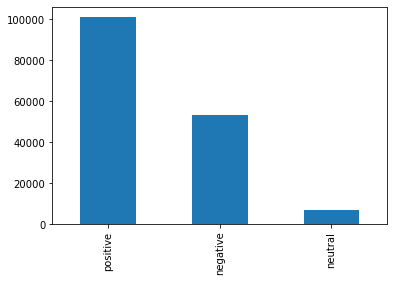

In [37]:
# How many positive and negative and neutral reviews?
dataset['sentiment_label'].value_counts().plot(kind='bar')

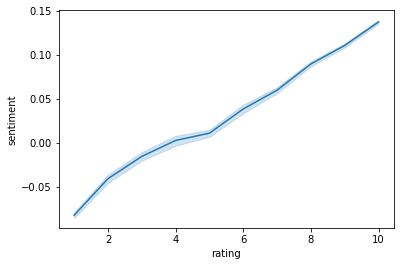

In [38]:
#### Correlation Between sentiment and rating
sns.lineplot(data=dataset,x='rating',y='sentiment')
plt.show()

<AxesSubplot:xlabel='rating', ylabel='sentiment'>

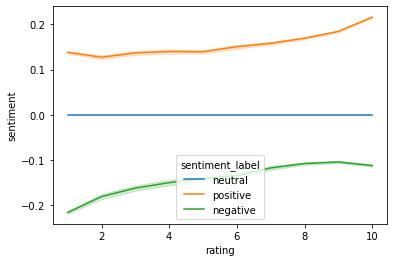

In [39]:
# Correlation  btween rating and sentiment
sns.lineplot(data=dataset,x='rating',y='sentiment',hue='sentiment_label')

# How many reviews are genuine as compared to the rating
+ genuine good rating =positive + rating 10-6
+ genuine bad rating = negative + rating 4-1

In [40]:
# Genuine Good  Rating Per Review
good_review =  dataset[(dataset['rating'] >= 6) & (dataset['sentiment_label'] == 'positive')]

In [41]:
# Genuine Bad  Rating Per Review
bad_review = dataset[(dataset['rating'] <= 4) & (dataset['sentiment_label'] == 'negative')]


In [42]:
good_review.head()


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_classes,sentiment,sentiment_label
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,None,0.168333,positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,None,0.179545,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,None,0.194444,positive
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32,antifungal (except metronidazole),0.074107,positive
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1,None,0.079167,positive


In [43]:
good_review.iloc[0]['review']


'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

#### Questions on UsefulCount
+ number of users who found review useful
+  Top UsefulCount By Drugs/Class
+ Best drugs based usefulcount

In [44]:
dataset.groupby('drugName')['usefulCount'].value_counts()


drugName                              usefulCount
A + D Cracked Skin Relief             6              1
A / B Otic                            20             1
Abacavir / dolutegravir / lamivudine  9              6
                                      1              5
                                      12             5
                                                    ..
ella                                  32             1
                                      42             1
femhrt                                0              1
                                      2              1
                                      42             1
Name: usefulCount, Length: 54324, dtype: int64

In [45]:
# Top Drugs Per UsefulCount
dataset.groupby('drugName')['usefulCount'].nunique().nlargest(20)

drugName
Fluoxetine       181
Gabapentin       181
Bupropion        177
Citalopram       176
Sertraline       172
Escitalopram     171
Prozac           171
Zoloft           171
Lexapro          169
Celexa           166
Amitriptyline    162
Lorcaserin       157
Trazodone        157
Duloxetine       153
Phentermine      150
Belviq           148
Alprazolam       146
Cymbalta         144
Venlafaxine      144
BuSpar           141
Name: usefulCount, dtype: int64

<AxesSubplot:xlabel='drugName'>

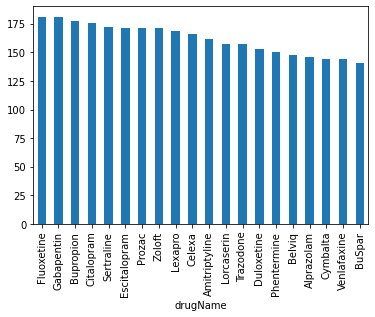

In [46]:
# Top Drugs Per UsefulCount
dataset.groupby('drugName')['usefulCount'].nunique().nlargest(20).plot(kind='bar')

In [47]:
# Top Drugs Class Per UsefulCount
dataset.groupby('drug_classes')['usefulCount'].nunique().nlargest(20)

drug_classes
opiod analgesics                     212
anti-anxiety                         198
oral hypoglycemics                   157
h2 blockers (anti-ulcers)            147
antifungal (except metronidazole)    139
arb blocker                          129
beta blockers                        123
antibiotic                           118
ace inhibitor                        111
calcium channel blocker              108
corticosteroid (prednisone)           97
antipyschotics (phenothiazine)        95
alpha blocker                         73
beta blocker                          65
antibiotic(penicillins)               60
thrombolytics                         59
anesthetic                            47
neuromuscular blocking agents         37
antibiotic (cephalosporins)           20
barbiturate                           16
Name: usefulCount, dtype: int64

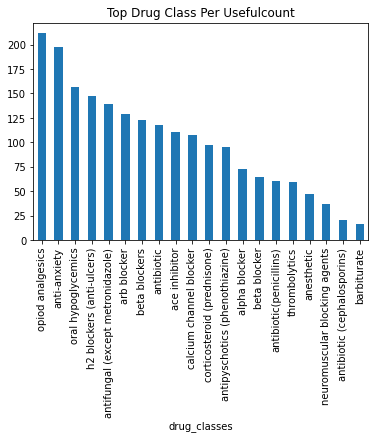

In [48]:
# Top Drugs Class Per UsefulCount
dataset.groupby('drug_classes')['usefulCount'].nunique().nlargest(20).plot(kind='bar')
plt.title("Top Drug Class Per Usefulcount")
plt.show()

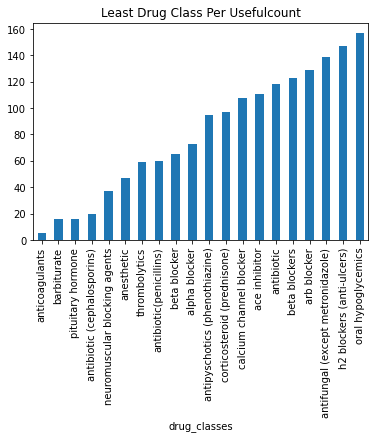

In [49]:
# Top Drugs Class Per UsefulCount
dataset.groupby('drug_classes')['usefulCount'].nunique().nsmallest(20).plot(kind='bar')
plt.title("Least Drug Class Per Usefulcount")
plt.show()

<AxesSubplot:xlabel='rating', ylabel='usefulCount'>

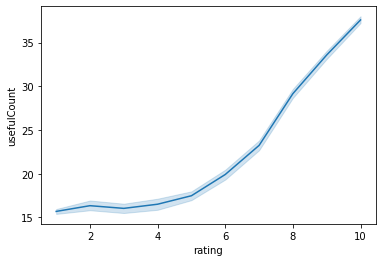

In [50]:
### Correlation between Rating and Usefulcount
sns.lineplot(data=dataset,x='rating',y='usefulCount')

In [51]:
# Rating Per Year
dataset.groupby('date')['rating'].size()

date
April 1, 2008        28
April 1, 2009        21
April 1, 2010        16
April 1, 2011        12
April 1, 2012        21
                     ..
September 9, 2013    44
September 9, 2014    45
September 9, 2015    90
September 9, 2016    99
September 9, 2017    55
Name: rating, Length: 3579, dtype: int64

In [52]:
# Averaging Rating Per Day of A Year
dataset.groupby('date')['rating'].mean()

date
April 1, 2008        8.285714
April 1, 2009        7.666667
April 1, 2010        7.812500
April 1, 2011        8.583333
April 1, 2012        9.238095
                       ...   
September 9, 2013    8.295455
September 9, 2014    8.800000
September 9, 2015    5.733333
September 9, 2016    6.777778
September 9, 2017    5.127273
Name: rating, Length: 3579, dtype: float64

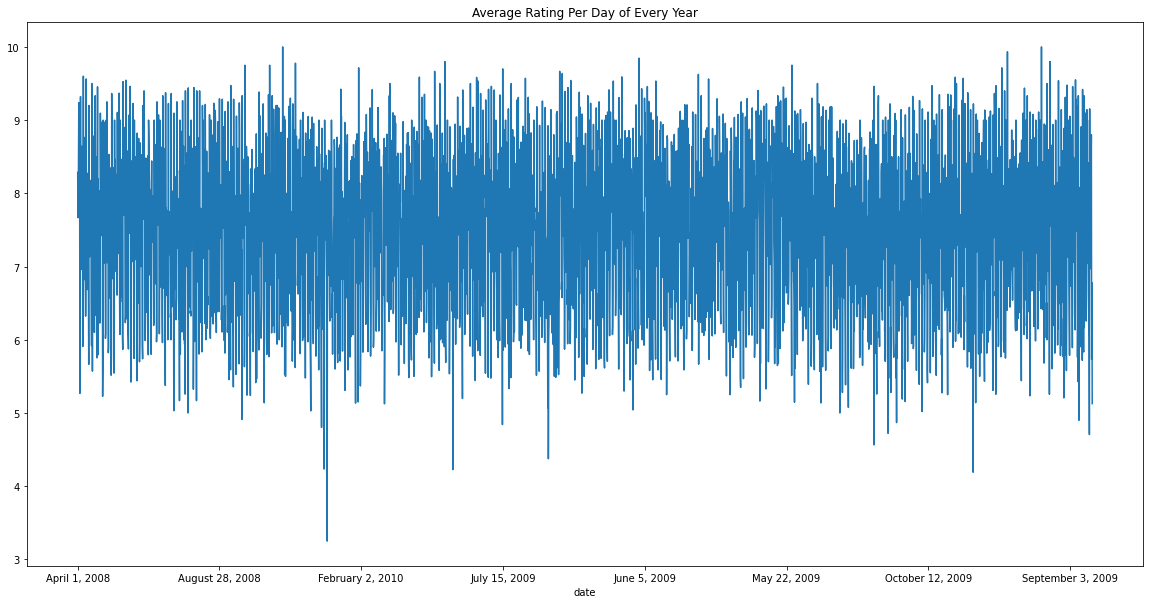

In [53]:
# Average Rating Per Day of Every Year
dataset.groupby('date')['rating'].mean().plot(figsize=(20,10))
plt.title("Average Rating Per Day of Every Year")
plt.show()

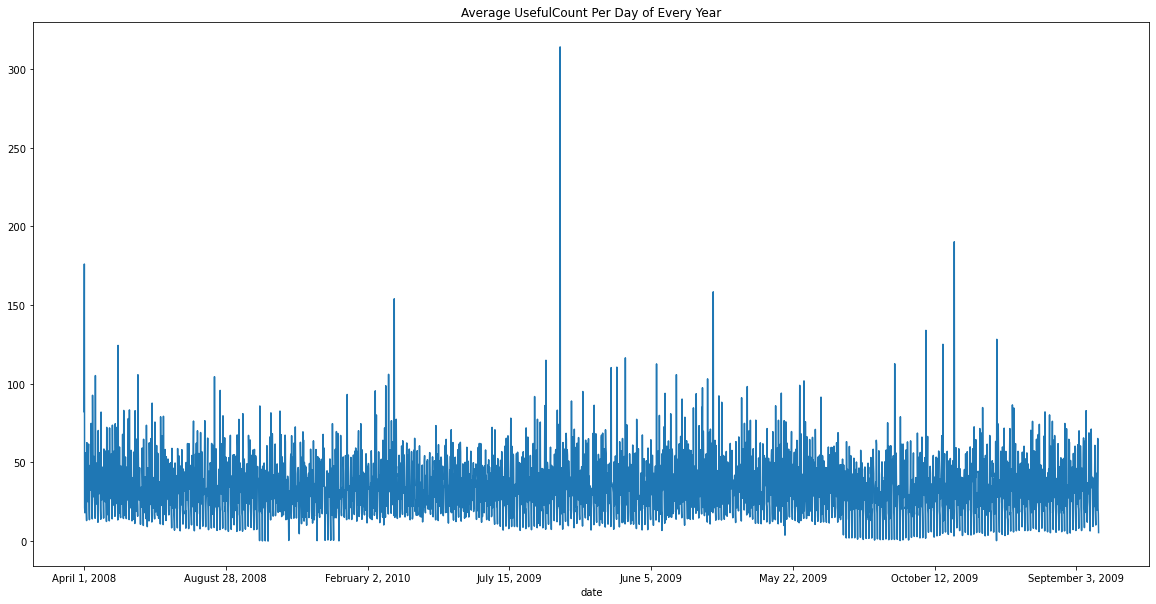

In [54]:
# Average Useful Per Day of Every Year
dataset.groupby('date')['usefulCount'].mean().plot(figsize=(20,10))
plt.title("Average UsefulCount Per Day of Every Year")
plt.show()

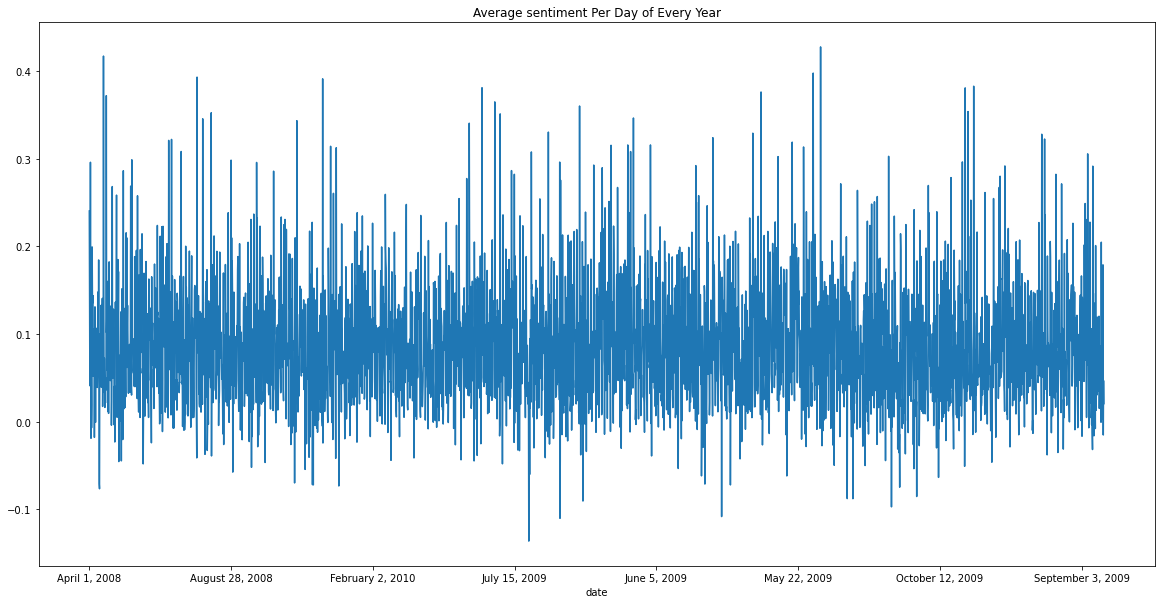

In [55]:
# Average Sentiment Per Day of Every Year
dataset.groupby('date')['sentiment'].mean().plot(figsize=(20,10))
plt.title("Average sentiment Per Day of Every Year")
plt.show()

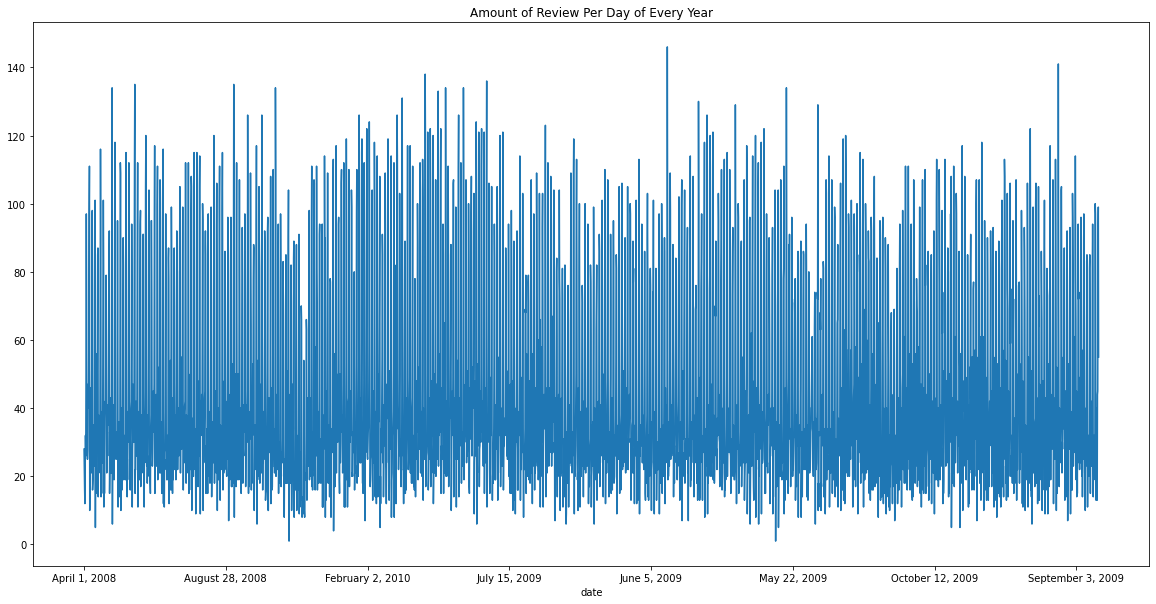

In [56]:
# Amount of Review Per Day of Every Year
dataset.groupby('date')['review'].size().plot(figsize=(20,10))
plt.title("Amount of Review Per Day of Every Year")
plt.show()

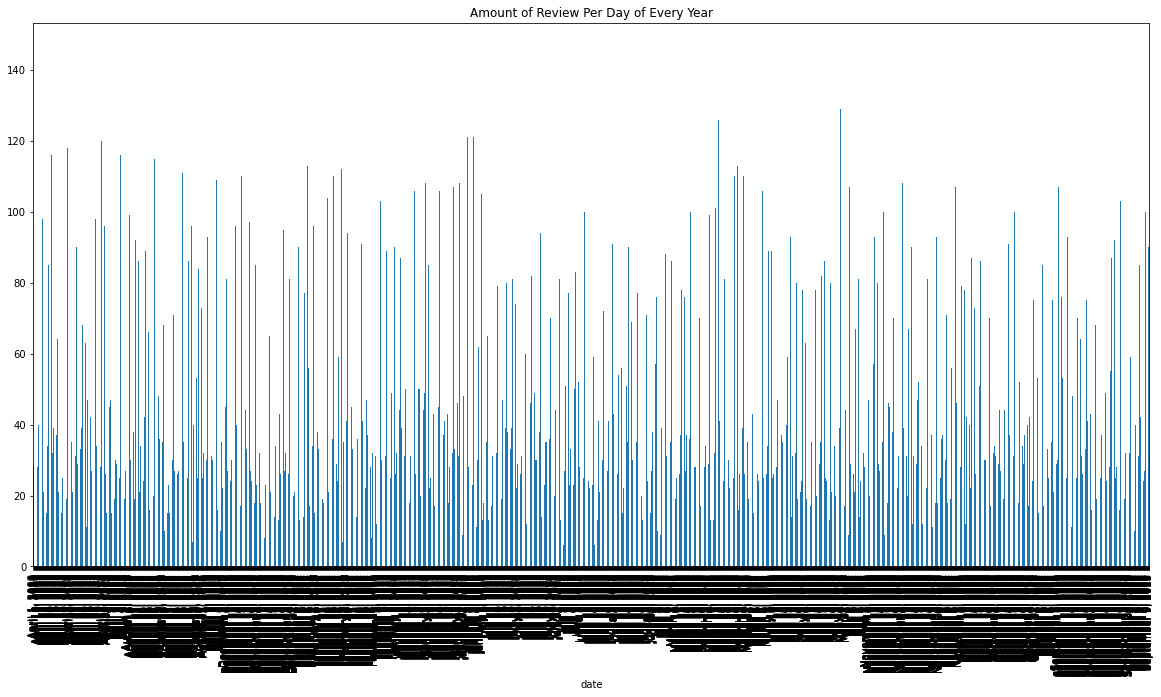

In [57]:
# Amount of Review Per Day of Every Year
dataset.groupby('date')['review'].size().plot(kind='bar',figsize=(20,10))
plt.title("Amount of Review Per Day of Every Year")
plt.show()

In [58]:
####  Using DatetimeIndex
grouped_date = dataset.groupby('date').agg({'rating':np.mean,'usefulCount':np.sum,'review':np.size})


In [59]:
grouped_date


,rating,usefulCount,review
date,,,
"April 1, 2008",8.285714,2303,28
"April 1, 2009",7.666667,3698,21
"April 1, 2010",7.812500,342,16
"April 1, 2011",8.583333,216,12
"April 1, 2012",9.238095,1178,21
...,...,...,...
"September 9, 2013",8.295455,1941,44
"September 9, 2014",8.800000,2935,45
"September 9, 2015",5.733333,1901,90


In [60]:
grouped_date.index


Index(['April 1, 2008', 'April 1, 2009', 'April 1, 2010', 'April 1, 2011',
       'April 1, 2012', 'April 1, 2013', 'April 1, 2014', 'April 1, 2015',
       'April 1, 2016', 'April 1, 2017',
       ...
       'September 9, 2008', 'September 9, 2009', 'September 9, 2010',
       'September 9, 2011', 'September 9, 2012', 'September 9, 2013',
       'September 9, 2014', 'September 9, 2015', 'September 9, 2016',
       'September 9, 2017'],
      dtype='object', name='date', length=3579)

In [61]:
grouped_date['date'] = grouped_date.index


In [62]:
grouped_date['date'] = pd.DatetimeIndex(grouped_date['date'])


In [63]:
grouped_date.dtypes


rating                float64
usefulCount             int64
review                  int64
date           datetime64[ns]
dtype: object

In [64]:
grouped_date = grouped_date.set_index('date')


In [65]:
# Select A Particular Date Range
grouped_date['2008'].plot()

<ipython-input-65-6d3d4f4b46ac>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  grouped_date['2008'].plot()


AssertionError: <class 'numpy.ndarray'>

In [ ]:
# AMount of Review Fr 2008
grouped_date['2008']['review'].plot()
plt.title("Amount of Review For 2008")
plt.show()

In [ ]:
# AMount of Review Fr 2008
grouped_date['2008':'2009']['review'].plot()
plt.title("Amount of Review For 2008-2009")
plt.show()

In [ ]:
# Distribution of Rating Over Time
grouped_date['2008':'2012']['rating'].plot(figsize=(20,10))
plt.title("Distribution of Rating Over Time")
plt.show()

In [ ]:
grouped_date['2008-04'].plot()


In [ ]:
# Distribution of Rating Over A Month
grouped_date['2008-4':'2008-5']['rating'].plot()
plt.title("Distribution of Rating Over Time")
plt.show()